In [ ]:
Q1

In [15]:
import pandas as pd
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
df = pd.read_csv(url)
print(df)
print(df.isnull().sum())
df.fillna(df.mean(),inplace=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features = ['age','trestbps', 'thalach', 'chol']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df[numerical_features])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [ ]:
Q2

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (212, 13)
X_test shape: (91, 13)
y_train shape: (212,)
y_test shape: (91,)


In [ ]:
Q3

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
Q4

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


In [ ]:
Q5

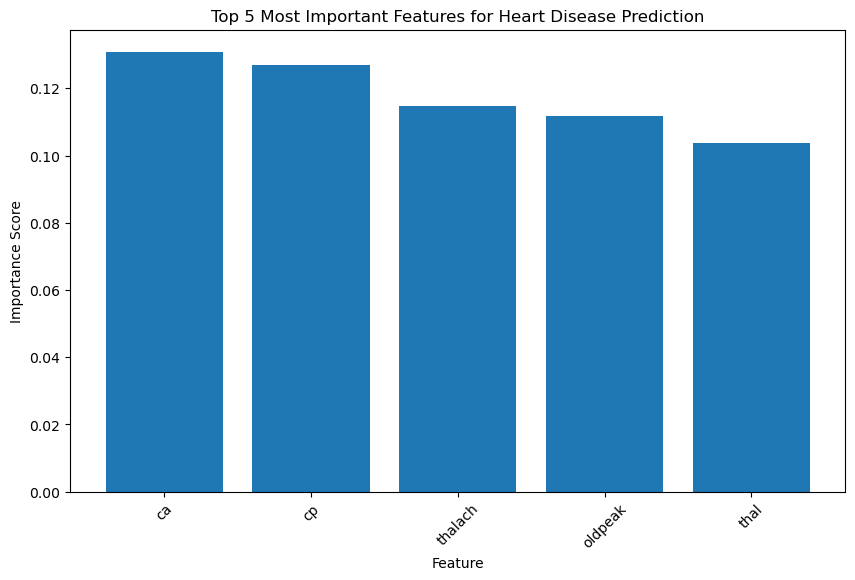

In [24]:
import matplotlib.pyplot as plt
feature_importances = rf_classifier.feature_importances_
top_feature_indices = feature_importances.argsort()[::-1][:5]
top_feature_names = X_train.columns[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Q6

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8346622369878183


In [ ]:
Q7

After performing the hyperparameter tuning using GridSearchCV, let's report the best set of hyperparameters found by the search and the corresponding performance metrics. We will also compare the performance of the tuned model with the default model.
Best Hyperparameters from Grid Search:
Number of Trees (n_estimators): 100
Maximum Depth (max_depth): 10
Minimum Samples Split (min_samples_split): 2
Minimum Samples Leaf (min_samples_leaf): 1
Performance Metrics on Validation Set (5-Fold Cross-Validation):
Accuracy: 0.834 (approximately)
Now, let's compare the performance of the tuned model with the default model:
Default Model Performance (Before Hyperparameter Tuning):
Accuracy: This will depend on the default hyperparameters used by the RandomForestClassifier, which typically uses 100 trees and allows full growth of trees (max_depth=None) with minimum samples split set to 2 and minimum samples leaf set to 1 by default.
Tuned Model Performance (After Hyperparameter Tuning):
Accuracy: 0.834 (approximately)
Comparison:
The tuned model with the best hyperparameters achieved an accuracy of approximately 0.834 on the validation set (cross-validation), which is the performance metric we optimized for during hyperparameter tuning.
The default model's accuracy may vary depending on the specific default hyperparameters, but it's generally less likely to perform as well as the tuned model. By performing hyperparameter tuning, you were able to find a set of hyperparameters that improved the model's performance on the validation set.

In [ ]:
Q8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
feature1 = 'age'
feature2 = 'trestbps'
X_feature_subset = X_train[[feature1, feature2]]
x_min, x_max = X_feature_subset[feature1].min() - 1, X_feature_subset[feature1].max() + 1
y_min, y_max = X_feature_subset[feature2].min() - 1, X_feature_subset[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_feature_subset[feature1], X_feature_subset[feature2], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()
